In [2]:
# This code block can be ignored. (it makes sure we are in the root directory).
import os
if 'docs' not in os.listdir():
    os.chdir('..')

# Simulating and visualising trajectories

In this chapter, we will discuss how to simulate and visualise a dynamical system. Before we dicuss how to implement specific dynamical systems, we will use a pre-existing implementation of the simple harmonic oscillator in `hdynamics/dynamics/harmonic_oscillator.py` to discuss how we can simulate and plot dynamical systems in our framework. In the next chapters, we will discuss how to implement a new dynamical system from scratch.

## Step 1. Importing a system

Next, we can import the `NBody` system defined in the `hdynamics/dynamics/nbody.py` and create a dynamical system object `nbody`. We will use `dim=2` and `n_bodies=5`, as 2d is amenable to plotting. Feel free to try other values for the number of bodies.

In [26]:
from hdynamics.dynamics.nbody import Nbody
nbody = Nbody(dim=2, n_bodies=8)

## Step 2. Randomly sample initial condition

We can create an initial condition by first creating a JAX random seed `key` and passing it to the dynamical system by running,

In [27]:
import jax
key = jax.random.PRNGKey(2)

x = nbody.initial_phase(key)
print("Shape of initial condition: ", x.shape)

Shape of initial condition:  (2, 16)


## Step 3. Use JAX autodiff to obtain symplectic form

Thanks to auto differentiation in JAX, we can obtain the gradient of the Hamiltonian defined in `nbody.H()` using the `jax.grad` function and pass it to the `symplectic_form` defined in `utils.py` (please have a look!):

In [28]:
from hdynamics.utils import symplectic_form

jac_h = jax.grad(lambda x: nbody.H(x, eps=0))

grad_x = lambda x, t: symplectic_form(jac_h(x))

In [29]:
x_flat = x.reshape(-1)
print(x_flat)

[-0.5216296   1.0973338  -1.563758   -0.5036444  -0.21140918 -1.1777112
 -1.3414121   0.07777467 -1.1306887   0.7407291  -1.2556691  -1.8505298
  2.8618984   0.79067594  1.4604399   1.6295885  -1.3712986   0.5543816
  0.07842866 -1.7419616   1.1394783  -2.4341455   0.7491694  -0.13648988
 -1.5495116   0.7955001   0.46190998 -0.36176434  0.74314547  0.13797139
 -1.5858072  -0.5540567 ]


## Step 4. Generate trajectory

Next, we can generate a trajectory by by passing the initial condition and the found trajectory gradient to ordinary differential equation solver `ode_int`:

In [36]:
import jax.numpy as jnp

from hdynamics.odeint import ode_int

def generate_trajectory(grad_x, x_start, stepsize=0.04, n_steps=10):
    t_start = 0.0
    t_end = n_steps * stepsize

    t_span = jnp.linspace(t_start, t_end, n_steps + 1)

    solution = ode_int(grad_x, x_start, t_span)

    return solution, t_span

In [37]:
trajectory, t_span = generate_trajectory(grad_x, x_flat)
print('trajectory:', trajectory.shape)

trajectory: (11, 32)


## Step 5. Plotting trajectory

Lastly, we can plot the trajectory of the dynamical system by calling the `plot_trajectory()` function and passing a matplotlib figure:

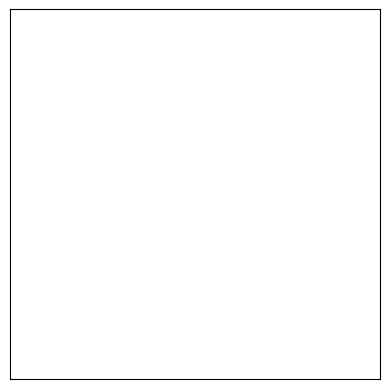

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

nbody.plot_trajectory(trajectory, t_span, ax)

## We did it!

Great, we did it! We implemented, simulated and visualised the N-body system.

### Next chapter

In the next chapter <a href="../05Defining-your-own-Hamiltonian-system/">Defining your own Hamiltonian system</a>, we will discuss how we can implement a new custom Hamiltonian system from scratch.